In [1]:
from atoms import *
from functions import *
from derivatives import *
import re
from expression import *
import numpy as np
from matplotlib import pyplot as plt
from graphics import *
from parsing import *
from evaluation import *
from vectors import *

# Univariate case

The class myexpr works as follows: each instance has a tag (called op or operation) and a left and right side - myexpr(TAG, LEFT, RIGHT). \
The following are examples of simple expressions:
1. sum of two terms -> myexpr('add',term1,term2)
2. product of two terms -> myexpr('mul',term1,term2)
3. sin(x) -> myexpr('sin', myexpr('id'))
4. x^n -> myexpr('pwr', myexpr('id'),myexpr('const','n'))
5. constants -> myexpr('const', 'value')
6. e^x -> myexpr('exp', myexpr('id'))

The following functionalities cvan be checked in the code cell below. \
An expression can be evaluated using single_eval():

- myexpr('sin',myexpr('id')).single_eval(2) = sin(2) = 0.90929... 

Or it can be differentiated using calc_diff() from derivatives.py: 

- calc_diff(myexpr('sin', myexpr('id'))) = cos(x) 

It can also be graphed using myplot() from graphics.py:

- myplot(myexpr('sin',myexpr('id')), np.linspace(-2,2,100))

Concatenation is supported by design, as the left and right sides can be myexpr themselves. 

## Parsing

Parsing of string to myexpr is possible with parsing.py. \
The string input should be given in infix notation and with explicit bracketing, i.e. $'1 + 2*(sin(x))'$, not $'1 + 2*sin(x)'$.
An explicit declaration of the variables is also required. 

sin(2) = 0.9092974268256817
the derivative of sin(x) is (cos(x))*(0)


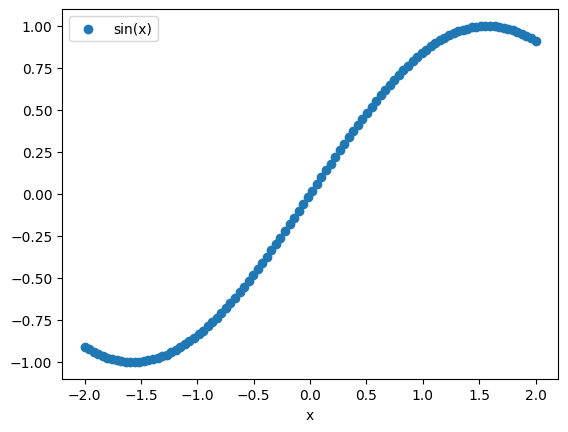

In [2]:
#The expression
term = myexpr('sin',myexpr('id'))

#Evaluation at x = 2
value = calc_eval(term,{'x': 2})
print(f'sin(2) = {value}')

#Derivative
der = calc_diff(term,'y')
print(f'the derivative of sin(x) is {der}')

#Graph
myscatter(term, np.linspace(-2,2,100), 'x')

#Parsing
expression = 'sin(x)'
#my_parser(['x'],expression)

# TO DO:

- MULTIVARIATE STUFF s.t. everything else already uses more vars
- partial derivatives

In [3]:
a = myexpr('add', myexpr('mul',myexpr('const', '3'), myexpr('id')), myexpr('id','a'))
calc_eval(a,{'x':2})

'6.0 + a'

In [4]:
b = myexpr('mul', myexpr('add',myexpr('sin',myexpr('add',myexpr('id'),myexpr('const','4.3'))),myexpr('id','y')),myexpr('const','2'))
calc_eval(b,{'x':2})
#b

'(0.016813900484349713 + y) * (2.0)'

In [5]:
parsed_term = my_parser(['x','y'],'(x - (sin(x)))*(y + 1)')
#calc_eval(parsed_term,{'x':0})
parsed_term

(x + (-1)*(sin(x)))*(y + (1)*(1))

In [6]:
term = my_parser(['x','y','z'],'x + y*z')
calc_eval(term,{'x':1,'y':0})

'1.0 + (1.0) * ((0.0) * (z))'

In [7]:
term = myexpr('mul',myexpr('add',myexpr('id','x'),myexpr('mul',myexpr('const','-1'),myexpr('sin',myexpr('id','x')))),myexpr('add',myexpr('id','y'),myexpr('const','1')))
term
calc_eval(term,{'x': 0})
#term

'(0.0) * (y + 1.0)'

In [8]:
calc_eval(parsed_term,{'x':0})

'(0.0) * (y + 1.0)'

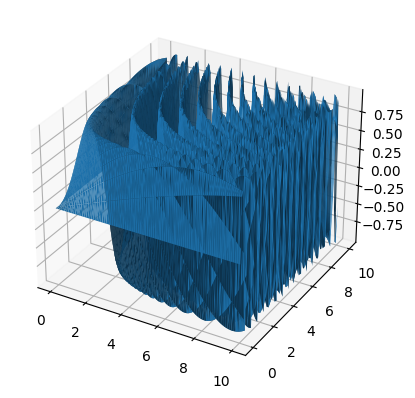

0

In [9]:
fct = my_parser(['x','y'],'sin(x*y)')
vals = np.linspace(0,10,100)
my3Dsurface(fct,{'x': vals, 'y': vals})

y_vals is of shape (289,)


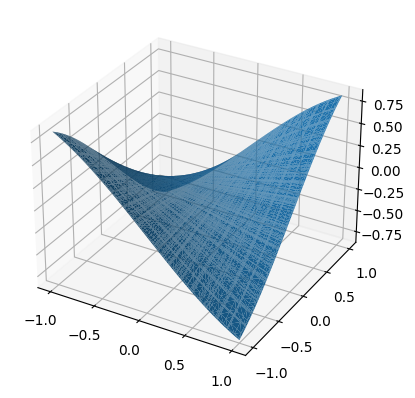

0

In [10]:
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x_vals = np.append(0, (radii*np.cos(angles)))
y_vals = np.append(0, (radii*np.sin(angles)))


print(f'y_vals is of shape {np.shape(y_vals)}')
my3Dsurface(myexpr('sin',myexpr('mul',myexpr('id','x'),myexpr('id','y'))),{'x': x_vals, 'y': y_vals})
#my3Dsurface(term,{'x':x_vals, 'y': y_vals})

In [11]:
v = vect(3)
c1 = myexpr('id','x')
c2 = myexpr('add',myexpr('id','y'),myexpr('const','2'))
c3 = myexpr('const','0')

v.add_comp(c1)
v.add_comp(c2)
v.add_comp(c3)

w = vect(3)
w.add_comp(c1)
w.add_comp(c2)
w.add_comp(c3)

#vect_dor_prod(v,w)
#vect_grad(myexpr('id','x'),['x'])
#vect_eval(v,{'x': 2, 'y': 0})
#print(v)
v
a = vect(2)
a.add_comp(myexpr('id','x'))
a.add_comp(myexpr('const', '1'))
b = vect(2)
b.add_comp(myexpr('const','0'))
b.add_comp(myexpr('id','x'))
c = vect(2)
c.add_comp(myexpr('const','1'))
c.add_comp(myexpr('const','2'))
d = vect(2)
d.add_comp(myexpr('const','3'))
d.add_comp(myexpr('const','4'))

m1 = matrix(2,2,[a,b])
m2 = matrix(2,2,[c,d])

print(mat_vect_prod(m1,a))
print(m1)
type(mat_eval(m1,{'x':1}).columns[0].components[0])

[(x)*(x) + (0)*(1), (1)*(x) + (x)*(1)]
[[  x,       0,     
  1,       x,     
]]


expression.myexpr

In [12]:
print(myexpr.__doc__)


    the overarching expression class, consists of two objects and an operation
    i.e. (left) OP (right)
    where left and right can be atoms or expressions and op is one of the binary arithmetic operations
    For special functions or just single terms do:
    1. sum of two terms -> myexpr('add',term1,term2) -- multiplication is 'mul'
    2. sin(x) -> myexpr('sin', myexpr('id'))
    3. x^n -> myexpr('pwr', myexpr('id'),myexpr('const','n'))
    4. constants -> myexpr('const', 'value')
    5. e^x -> myexpr('exp', myexpr('id'))

    Upon initializing it creates
    (i) self.worth = lambda x: output -> function that is used for evaluation, x is value at which eval is called, output is dependent on self.op
    (ii) self.str -> string representation for __str__ and __repr__

    To create multiple different variables use explicit variable naming: myexpr('id','VARIABLE NAME').
    


In [13]:
term = my_parser(['x','y'],'sin(-x*y)')
term.op
#my3Dsurface(term,{'x': np.linspace(-1,1,50), 'y': np.linspace(-1,1,50)})

'sin'

In [14]:
calc_eval(my_parser(['x'],'x/(1+x)'), {'x':1})
len(np.linspace(-5,5,10))

10

[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]]
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]

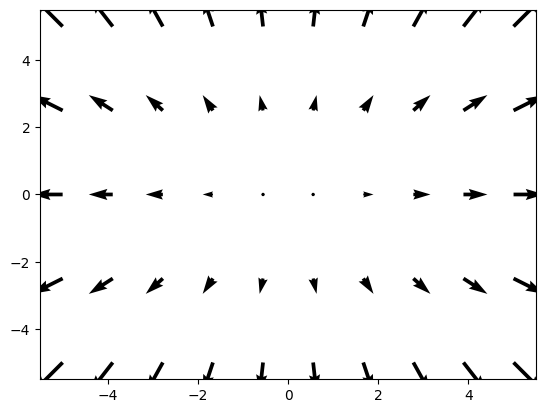

In [15]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
print(x)
#print(y)
u = x
v = y

#print(x[0][0], y[0][0])
#print(u[0][0])
#print(v[0][0])
print(u)
#print(v)

plt.quiver(x,y,u,v)
plt.show()

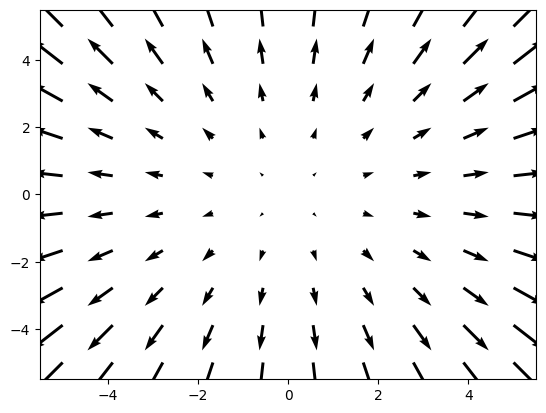

0

In [16]:
v_field = vect(2)
v_field.add_comp(myexpr('id','x'))
v_field.add_comp(myexpr('id','y'))
myvectfield2D(v_field,{'x': np.linspace(-5,5,10), 'y': np.linspace(-5,5,10)})

In [17]:
vect_eval(v_field, {'x': 1, 'y': 1}).components[0].worth

<function expression.myexpr.__init__.<locals>.<lambda>(x)>

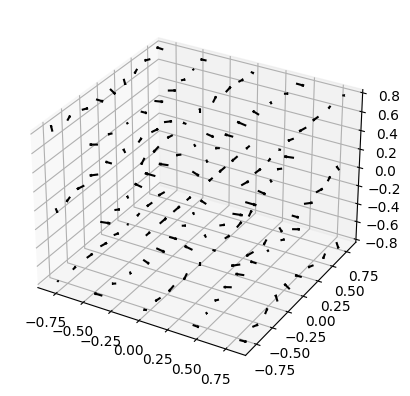

[[[-0.38471038  0.47552891 -0.38471038]
  [-0.62247244  0.76941943 -0.62247244]
  [ 0.         -0.          0.        ]
  [ 0.62247244 -0.76941943  0.62247244]
  [ 0.38471038 -0.47552891  0.38471038]]

 [[-0.1469458   0.18163527 -0.1469458 ]
  [-0.23776252  0.29389108 -0.23776252]
  [ 0.         -0.          0.        ]
  [ 0.23776252 -0.29389108  0.23776252]
  [ 0.1469458  -0.18163527  0.1469458 ]]

 [[ 0.146947   -0.18163676  0.146947  ]
  [ 0.23776446 -0.29389348  0.23776446]
  [-0.          0.         -0.        ]
  [-0.23776446  0.29389348 -0.23776446]
  [-0.146947    0.18163676 -0.146947  ]]

 [[ 0.38471112 -0.47552983  0.38471112]
  [ 0.62247364 -0.76942092  0.62247364]
  [-0.          0.         -0.        ]
  [-0.62247364  0.76942092 -0.62247364]
  [-0.38471112  0.47552983 -0.38471112]]

 [[ 0.47552891 -0.58778697  0.47552891]
  [ 0.76941943 -0.95105619  0.76941943]
  [-0.          0.         -0.        ]
  [-0.76941943  0.95105619 -0.76941943]
  [-0.47552891  0.58778697 -0.47

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.4),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(3.14159 * x) * np.cos(3.14159 * y) * np.cos(3.14159 * z)
v = -np.cos(3.14159 * x) * np.sin(3.14159 * y) * np.cos(3.14159 * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(3.14159 * x) * np.cos(3.14159 * y) *
     np.sin(3.14159 * z))

ax.quiver(x, y, z, u, v, w, length=0.1, color = 'black')

plt.show()
print(u)

In [19]:
v1 = vect(3)
v1.add_comp(my_parser(['x','y','z'], '(sin(3.14159*x))*((cos(3.14159*y))*(cos(3.14159*z)))'))
v1.add_comp(my_parser(['x','y','z'], '(-1)*((cos(3.14159*x))*((sin(3.14159*y))*(cos(3.14159*z)))))'))
v1.add_comp(my_parser(['x','y','z'], '((0.66)**(0.5))*((cos(3.14159*x))*((cos(3.14159*y))*(sin(3.14159*z)))))'))


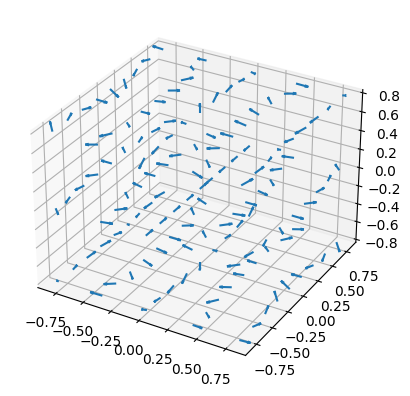

0

In [20]:
myvectfield3D(v1,{'x': np.arange(-0.8, 1, 0.4), 'y': np.arange(-0.8, 1, 0.2), 'z': np.arange(-0.8, 1, 0.8)})

In [21]:
calc_eval(my_parser([],'2/3'),{})

0.6666666666666666